In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
a_df=pd.read_excel('a.xlsx')

In [3]:
b_df=pd.read_excel('b.xlsx')

In [4]:
c_df=pd.read_excel('c.xlsx')

In [5]:
a_df.shape

(1064, 97)

In [6]:
b_df.shape

(1047, 97)

In [7]:
c_df.shape

(1063, 97)

# 시간별 합계

In [8]:
def sum_times(df):
    t_df=df.groupby('date').sum().T
    t_df['times']=[str(i)[:2] for i in a_df.columns[1:]]
    return t_df.groupby('times').sum().T

In [9]:
a_times_sum=sum_times(a_df)
b_times_sum=sum_times(b_df)
c_times_sum=sum_times(c_df)

## 일별 합계

In [10]:
def sum_days(df):
    return df.groupby('date').sum().T.sum()

In [11]:
a_days_sum=sum_days(a_df)
b_days_sum=sum_days(b_df)
c_days_sum=sum_days(c_df)

## 월별 총 합계

In [12]:
def sum_month(df):
    df['month']=[i.split('-')[0]+i.split('-')[1] for i in df.index]
    return df.groupby('month').sum().T.sum()

In [13]:
a_times_month=sum_month(a_times_sum)
b_times_month=sum_month(b_times_sum)
c_times_month=sum_month(c_times_sum)

## 연별 총 합계

In [14]:
def sum_years(df):
    df['year']=[i[:4] for i in df.date]
    return df.groupby('year').sum().T.sum()

In [15]:
a_years_sum=sum_years(a_df)
b_years_sum=sum_years(b_df)
c_years_sum=sum_years(c_df)

## 시각화

In [17]:
a_times=a_times_sum.drop(['month'],axis=1).sum()
b_times=b_times_sum.drop(['month'],axis=1).sum()
c_times=c_times_sum.drop(['month'],axis=1).sum()

In [18]:
time_by_co=pd.DataFrame([a_times,b_times,c_times])

In [19]:
time_by_co.index=['A','B','C']

In [20]:
time_by_co

times,00,01,02,03,04,05,06,07,08,09,...,15,16,17,18,19,20,21,22,23,24
A,36075316.2,48952776.6,49203445.2,49019653.2,49279574.4,49315753.2,48835945.2,47611145.4,46641096.6,42291270.0,...,36925387.8,37010992.2,38900580.6,39151522.2,40077958.2,41620131.0,42244792.8,42026212.2,45150063.0,11735014.2
B,53923094.4,72644308.8,73290016.8,73812219.6,73693460.4,73872414.0,73717568.4,73335570.0,72443708.4,70900166.4,...,66100347.6,66303778.8,65817049.2,65685051.6,66253185.6,67720590.0,68781795.6,69076140.0,70094984.4,17427034.8
C,77755182.4,105670210.8,107150027.6,108278181.2,108556728.0,108564416.8,108407989.2,107670368.4,105180647.6,93450840.0,...,78951717.6,78776843.6,82200465.2,85511958.0,87519082.0,90894414.8,94288023.2,96162953.6,101961857.2,25617132.8


## 회사별 시간별 사용량

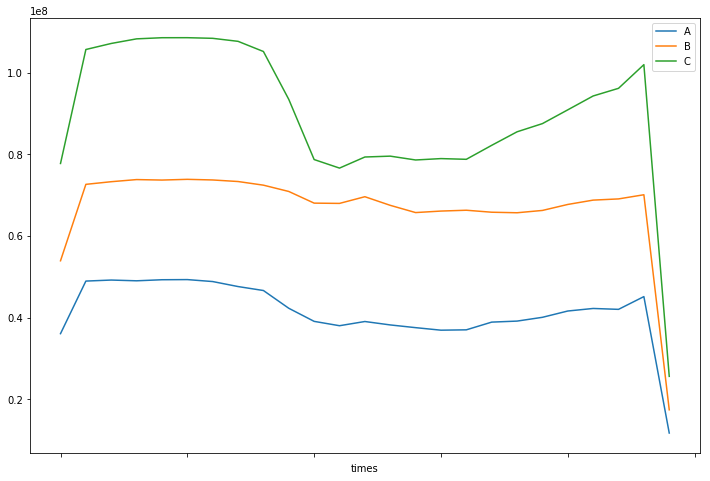

In [21]:
lines = time_by_co.T.plot.line(figsize=(12,8))
plt.show()

## 회사별 일별 사용량

In [22]:
day_by_co=pd.DataFrame([a_days_sum,b_days_sum,c_days_sum])
day_by_co.index=['A','B','C']

In [23]:
day_by_co.to_excel('day_by_co.xlsx')

![day_by_co](day_by_co.png)

## 월별 회사별 사용량

In [24]:
month_by_co=pd.DataFrame([a_times_month,b_times_month,c_times_month])
month_by_co.index=['A','B','C']

In [25]:
month_by_co

month,201701,201702,201703,201704,201705,201706,201707,201708,201709,201710,...,201902,201903,201904,201905,201906,201907,201908,201909,201910,201911
A,26797075.2,25329053.4,35317552.2,34397764.8,34989150.0,33888976.8,33116731.2,30149469.0,30555176.4,33389575.8,...,23581752.6,30515461.2,33418287.0,34358616.6,33796522.2,30157142.4,30387079.8,24276848.4,23840611.2,22321471.2
B,51268996.8,43428235.2,51969993.6,48189624.0,51604996.8,50862033.6,47755780.8,43223964.0,50332279.2,51434947.2,...,37898372.4,51057762.0,47767238.4,46625166.0,38587273.2,38607349.2,45186993.6,43232742.0,46108860.0,48040213.2
C,66438528.8,47711787.2,73627808.8,72618000.0,78580552.4,65198666.4,62116664.4,54763074.8,62078940.0,68301240.0,...,46653583.2,69269029.2,72749370.4,76708769.2,68027993.6,65495995.6,45431400.0,58516928.4,69741459.2,69463150.4


In [26]:
month_by_co.T.to_excel('month_by_co.xlsx')

![month_by_co](month_by_co.png)

In [27]:
years_by_co=pd.DataFrame([a_years_sum,b_years_sum,c_years_sum])
years_by_co.index=['A','B','C']

In [28]:
years_by_co.to_excel('years_by_co.xlsx')

![years_by_co](years_by_co.png)

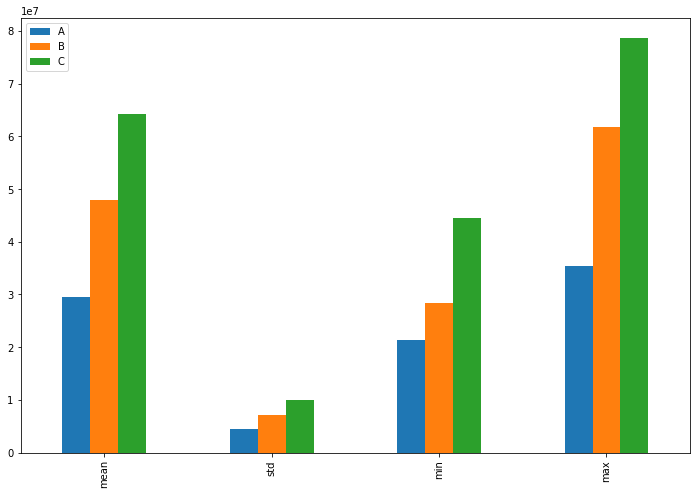

In [29]:
des_month=month_by_co.T.describe().drop(['count','25%','50%','75%'])
des_month.plot.bar(figsize=(12,8))
plt.show()